In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import pyplot
import os
from collections import Counter
import seaborn as sns

df = pd.read_csv('./input/noh05.csv')
df.head()

,B,C,E,F,H,I,L,M,N
0,100,11,4,3.00,6,36,0,0,1.83
1,93,0,0,-1.86,6,37,0,0,2.63
2,41,16,2,0.00,1,39,0,0,0.25
3,94,1,0,-7.40,7,42,1,27,3.42
4,94,11,0,-0.33,7,48,2,0,3.21


In [2]:
from sklearn.model_selection import train_test_split
x = df[['B',
        'C',
        'E',
        'F',
        'H',
        'I',
        'L',
        'M']]     #총 13개 파라미터
  
y = df[['N']]     #당해학점 예측하기

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [3]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [4]:
y_predict = mlr.predict(x_test)

In [5]:
print(y_test[0:10]) 

        N
45   3.83
101  3.58
41   3.33
31   4.00
132  3.00
15   3.33
104  3.17
0    1.83
80   3.25
106  4.50


In [6]:
print(y_predict[0:10])

[[3.48152746]
 [3.36671172]
 [3.48615514]
 [3.64902128]
 [2.27927927]
 [4.36058826]
 [3.7658859 ]
 [1.58915717]
 [3.65900835]
 [3.33161856]]


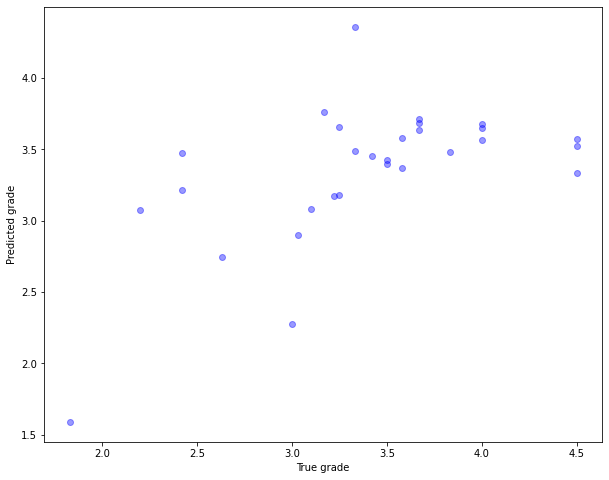

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,8])
plt.scatter(y_test, y_predict,c='b', alpha=0.4)
plt.xlabel("True grade")
plt.ylabel("Predicted grade")
plt.show()

In [8]:
print(mlr.coef_)

[[ 0.03204019 -0.00746706 -0.30983718 -0.01150713  0.05710903  0.00284902
   0.09870223  0.00479722]]


In [9]:
print(mlr.score(x_train, y_train))

0.5867161132063438


In [10]:
xx = np.array(y_test)
yy = np.array(y_predict)

In [11]:
xx.shape

(29, 1)

In [12]:
yy.shape

y=yy
x=xx


In [13]:

def mean(inp):
    result = 0
    len_inp = len(inp)    
    for i in inp:
        result += i
    result = result / len_inp
    return result

def make_b(x, y):
    mean_x = mean(x)
    mean_y = mean(y)
    son = 0
    mom = 0
    for i in range(len(x)):
        son += (x[i] - mean_x) * (y[i] - mean_y)
    for i in range(len(y)):
        mom += (x[i] - mean_x) ** 2
    b = son / mom
    return b

def make_a(x, y):
    mean_x = mean(x)
    mean_y = mean(y)
    b = make_b(x, y)
    a = mean_y  - (b * mean_x)
    return a

b = make_b(x, y)
a = make_a(x, y)

reg_y = []
for i in x:
    reg_y.append(a + (b * i))

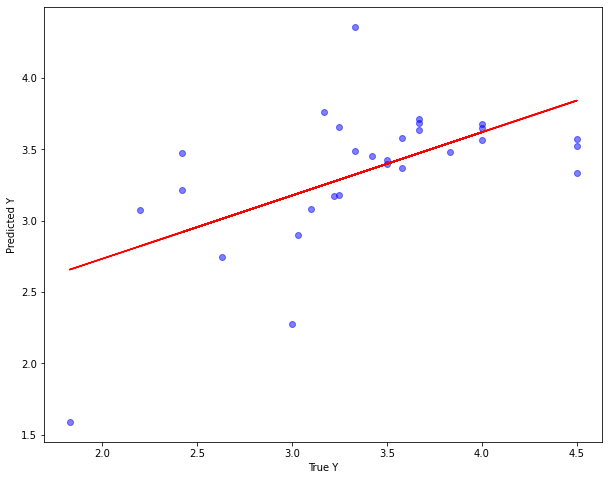

In [14]:
plt.figure(figsize=[10,8])
plt.scatter(x, y, label = 'real',c = 'b', alpha=0.5)
plt.plot(x, reg_y, c = 'r', label = 'reg')
plt.xlabel('True Y')
plt.ylabel('Predicted Y')
plt.show()